# PREDICTING A MODEL TO CALCULATE SCORE OF HAPPINESS 

In [48]:
%matplotlib inline
!pip install plotly
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [49]:
# Read the csv file into a pandas DataFrame
Data_Analysis = pd.read_csv('Data_Analysis.csv')
Data_Analysis.head(20)

,Country,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,Finland,7.62,1.36,1.57,0.89,0.63,0.20,0.39
1,Norway,7.56,1.52,1.57,0.90,0.64,0.31,0.33
2,Denmark,7.56,1.41,1.57,0.89,0.63,0.30,0.41
3,Iceland,7.50,1.40,1.63,0.92,0.63,0.39,0.14
4,Switzerland,7.49,1.48,1.53,0.95,0.62,0.27,0.36
5,Netherlands,7.44,1.42,1.48,0.90,0.59,0.38,0.29
6,New Zealand,7.32,1.33,1.57,0.91,0.62,0.40,0.38
7,Sweden,7.31,1.41,1.49,0.92,0.62,0.31,0.38
8,Canada,7.31,1.39,1.51,0.92,0.62,0.35,0.30
9,Australia,7.26,1.40,1.54,0.93,0.60,0.39,0.30


# Create model

In [50]:
# Assign the data to X and y
X = Data_Analysis[["GDP_per_capita", "Social_support", "Healthy_life_expectancy", "Freedom", "Generosity", "Perceptions_of_corruption"]]
y = Data_Analysis["Score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (164, 6) (164, 1)


In [51]:
# Create the model using LinearRegression

model = linear_model.LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)

print('Xs coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
print(f"R2 Score: {score}")

Xs coefficients:  [[0.83967072 1.14963842 1.01561784 1.4994525  0.45090078 0.73923403]]
y-axis intercept:  [1.76987127]
R2 Score: 0.8047110676017012


# Train and Test our model

In [52]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

Training Score: 0.7837733985965376
Testing Score: 0.8526495440120381


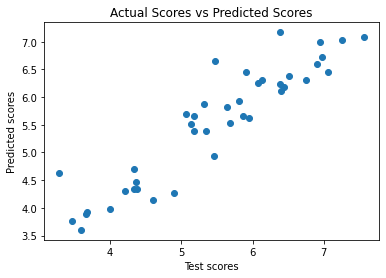

In [53]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)

y_predict= model.predict(X_test)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

plt.scatter(y_test, y_predict) 
plt.xlabel("Test scores")
plt.ylabel("Predicted scores")
plt.title("Actual Scores vs Predicted Scores")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

plt.show()

In [54]:
# model.predict(X_train, y_test)
model.predict([[1.340,1.587,0.986,0.596,0.153,0.393]])

array([[6.98402181]])

In [55]:
#Predict happniness score for United States (actual score from data is 6.92)

model.predict([[1.433,1.457,0.874,0.454,0.280,0.128]])


array([[6.45835187]])

In [56]:
#Predict happniness score for Finland (actual score from data is 7.62)

model.predict([[1.340,1.587,0.986,0.596,0.153,0.393]])


array([[6.98402181]])

In [57]:
y_predict= model.predict(X_test)

print(f"First 10 Predictions:   {y_predict[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [[4.70298032]
 [4.14261746]
 [4.33976957]
 [6.45053659]
 [5.39047277]
 [6.10897634]
 [3.76368411]
 [5.62540813]
 [5.69070503]
 [3.97705988]]
First 10 Actual labels: [[4.33], [4.6], [4.38], [5.91], [5.18], [6.4], [3.46], [5.95], [5.06], [4.0]]


In [58]:

dff=pd.DataFrame( y_predict[:10], columns=['Prediction'])
dff

,Prediction
0,4.702980
1,4.142617
2,4.339770
3,6.450537
4,5.390473
5,6.108976
6,3.763684
7,5.625408
8,5.690705
9,3.977060


In [59]:
df=pd.DataFrame(y_test[:10].tolist(), columns=['Actual'])
df

,Actual
0,4.33
1,4.60
2,4.38
3,5.91
4,5.18
5,6.40
6,3.46
7,5.95
8,5.06
9,4.00


Trainning Score >Testing Score

Text(0.5, 1.0, 'Residual Plot')

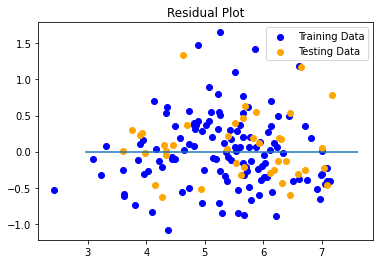

In [60]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Actual vs Prediction

In [61]:
df = px.data.tips()
X = df.total_bill[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, df.tip, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction'),
    
])
fig.show()

C:\Users\Lan\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [62]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.81850135209866, R2: 0.5730767194449456
